# **Project Overview**

This report provides a comprehensive overview of the Credit Card Default Prediction project. The objective of this project is to build a machine learning model to predict whether a credit card client in Taiwan will default on their payment next month based on various features.


# **Dataset Information**

The dataset used in this project contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.


# **Data Features**

The dataset consists of 25 variables, including:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: Education level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0 to PAY_6: Repayment status for the last six months
8. BILL_AMT1 to BILL_AMT6: Amount of bill statement for the last six months (NT dollar)
9. PAY_AMT1 to PAY_AMT6: Amount of previous payment for the last six months (NT dollar)
10. default.payment.next.month: Default payment (1=yes, 0=no)


## **Data Preprocessing** (sanity check)

1. Data Cleaning: Check for missing values and handle them appropriately. Ensure consistency in data types.
2. Data Exploration: Perform exploratory data analysis (EDA) to understand data distributions and relationships between features.
3. Feature Engineering: Create new features if necessary and encode categorical variables (e.g., one-hot encoding for education and marriage).
4. Data Split: Split the dataset into training and testing sets for model evaluation.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('dataset credit card default.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

# Separate features and target
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# Check for missing values and handle them if necessary
print(X.isnull().sum())
print(y.isnull().sum())

# Handle missing values if needed
# Example: Fill missing values with the median for numerical columns
X.fillna(X.median(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Sanity Check Accuracy: {accuracy:.2f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
#renaming of columns
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [10]:
#check for rename

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
#replacing values with labels
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [12]:
#checking for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


# EDA (Exploratory Data Analysis)

**Dependent Variable:**

Is Defaulter

In [13]:
#Value counts of Isdefaulter
df['IsDefaulter'].value_counts()

,count
IsDefaulter,
No,23364
Yes,6636


<Axes: xlabel='IsDefaulter', ylabel='count'>

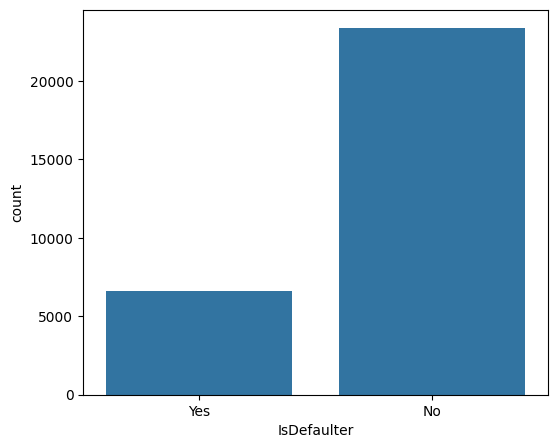

In [14]:
#value count plot for IsDefaulter
plt.figure(figsize=(6,5))
sns.countplot(x = 'IsDefaulter', data = df)

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

# Independent Variable

In [15]:
#Value counts for sex category
df['SEX'].value_counts()

,count
SEX,
Female,18112
Male,11888


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='SEX', ylabel='count'>

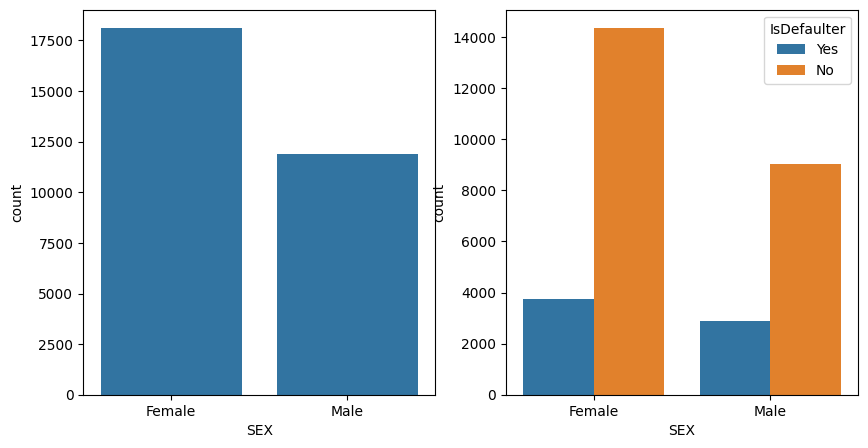

In [16]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

# Purpose:
First plot helps to understand the overall gender distribution.

Second plot helps to explore the relationship between gender and credit card default status, answering questions like:

*   Is one gender more likely to default than the other?
*   How many males vs. females are defaulters?


This visualization is useful for detecting any potential patterns or imbalances between gender and credit default behavior.








# Education
As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [17]:
fil = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)
df.loc[fil, 'EDUCATION'] = 'Others'

In [18]:
#Value counts for education category
df['EDUCATION'].value_counts()

,count
EDUCATION,
University,14030
Graduate School,10585
High School,4917
Others,468


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='EDUCATION', ylabel='count'>

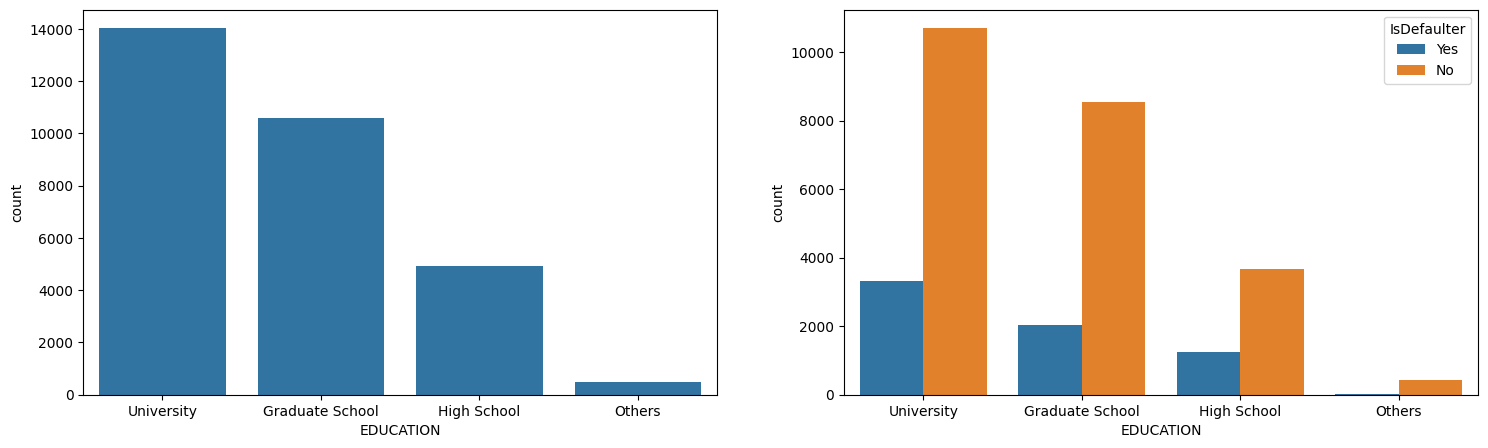

In [19]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

# Purpose:
First plot: Understand the overall distribution of education levels among the customers.

Second plot: Investigate the relationship between education level and the likelihood of default. This can reveal patterns, such as whether higher education levels are associated with fewer defaults.

# Marriage

In [20]:
#Value counts for marriage category
fil = df['MARRIAGE']==0
df.loc[fil,'MARRIAGE'] = 'Others'
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
Single,15964
Married,13659
Others,377


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='MARRIAGE', ylabel='count'>

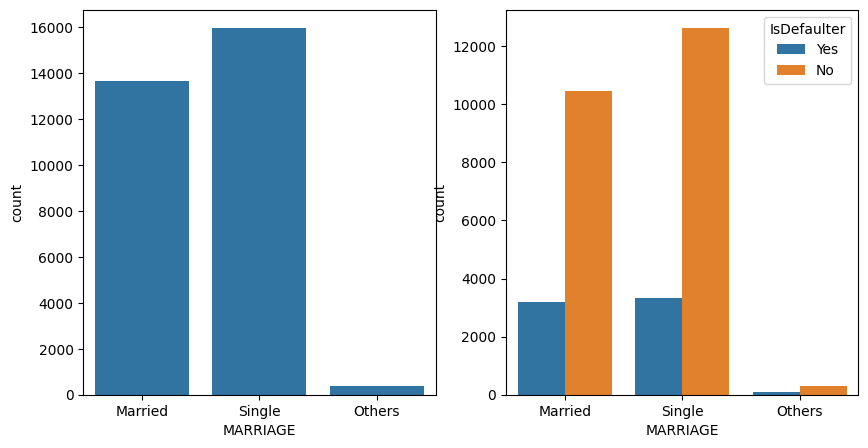

In [21]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

# Purpose:
First plot: Understand the general distribution of marital status in the dataset.

Second plot: Explore the relationship between marital status and the likelihood of default. This can help identify patterns, such as whether married people are more or less likely to default compared to singles or others.

# **Age**
Plotting graph of number of ages of all people with credit card irrespective of gender.

In [22]:
#age wise values of credit card holder
df['AGE'].value_counts()

,count
AGE,
29,1605
27,1477
28,1409
30,1395
26,1256
31,1217
25,1186
34,1162
32,1158


<Axes: xlabel='AGE', ylabel='count'>

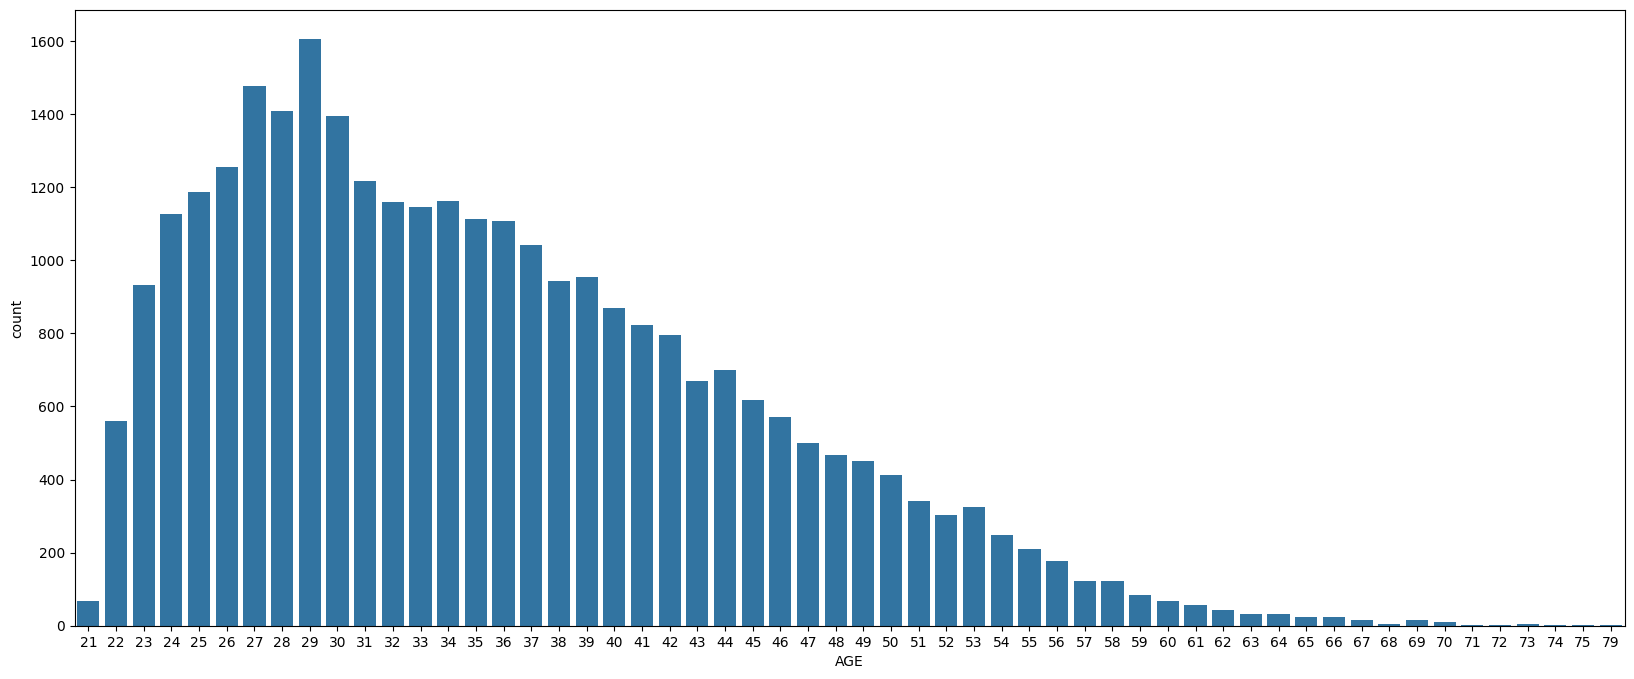

In [23]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='AGE', ylabel='count'>

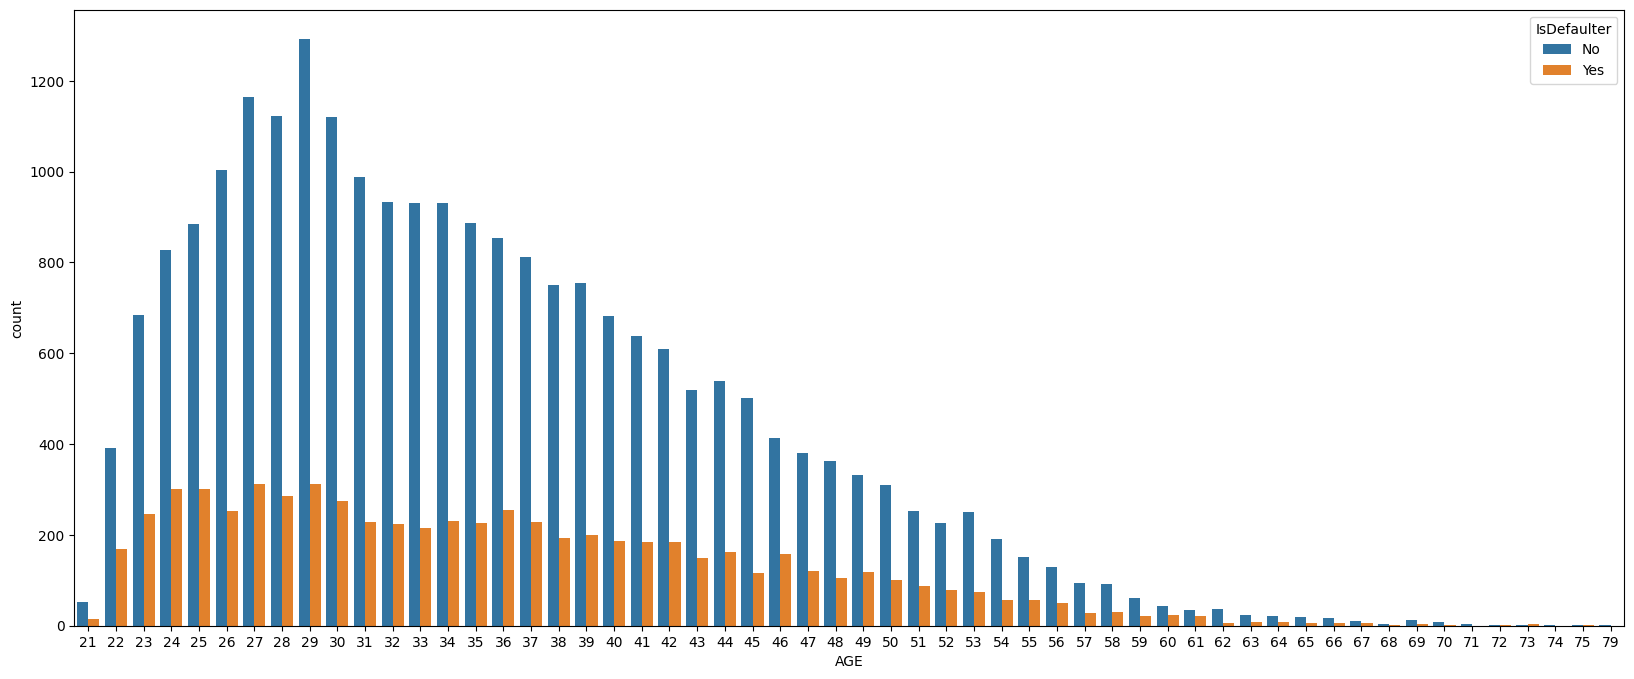

In [24]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

# Below are few observations for categorical features:

There are more females credit card holder, so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

# Checking Correlation

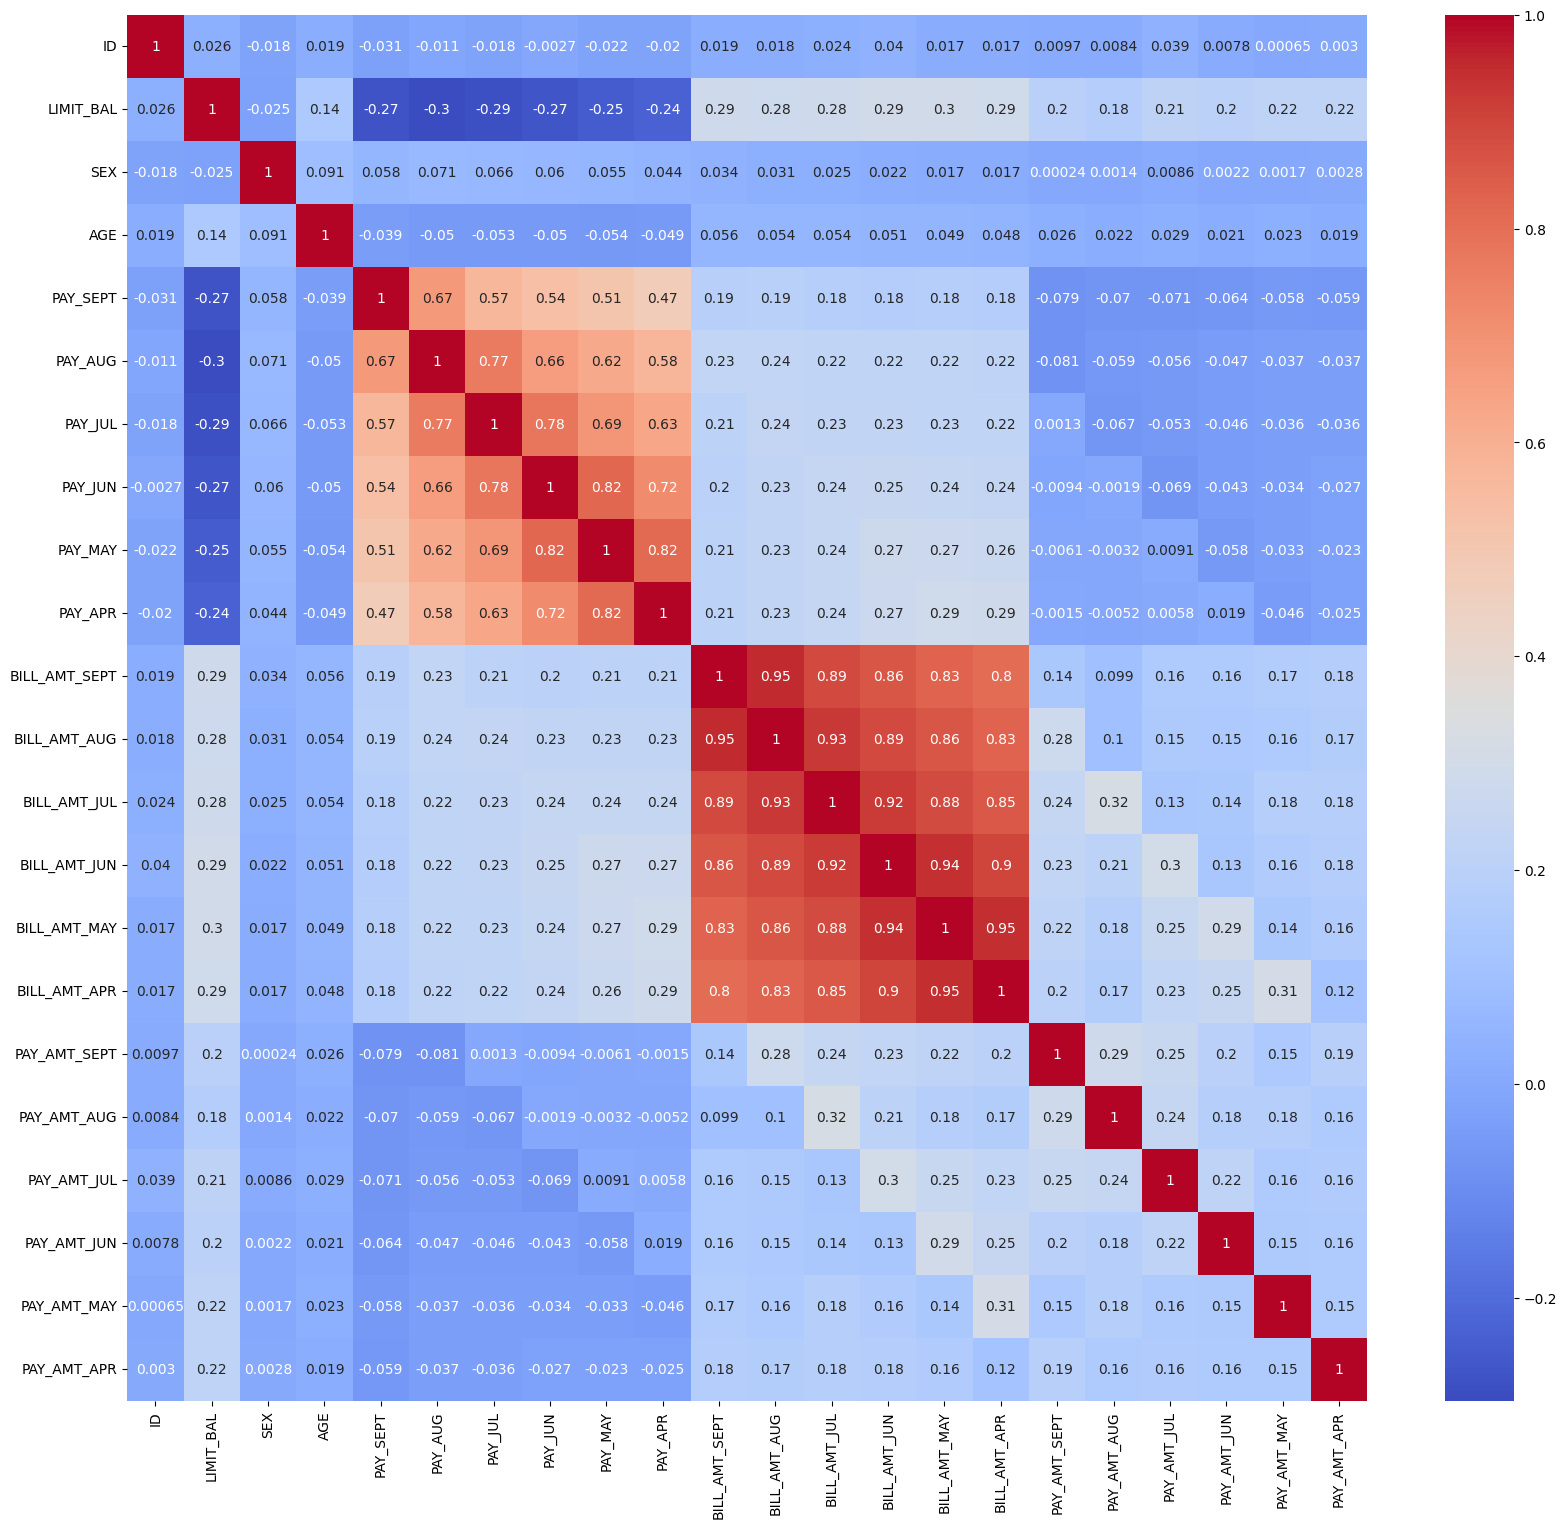

In [28]:
plt.figure(figsize=(20,18))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap="coolwarm") # Select only numeric columns for correlation calculation.
plt.show()

In [29]:
df.shape

(30000, 25)

# One Hot Encoding

In [30]:
#Label encoding
encode_num = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
df=df.replace(encode_num)

<ipython-input-30-55a0cdb5c461>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(encode_num)


In [31]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,0,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
#creating dummy variables
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE'])

In [33]:
df.shape

(30000, 30)

In [34]:

df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [35]:
df.shape

(30000, 28)

In [36]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [37]:
df.shape

(30000, 80)

In [38]:
#checking all variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,False,False,False,True,False,False,False,False,False,False
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,False,False,True,False,False,False,False,False,False,False
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,False,False,True,False,False,False,False,False,False,False
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,False,False,True,False,False,False,False,False,False,False


# Handling Class Imbalance
As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

# **SMOTE - Synthetic Minority Oversampling Technique**

In [39]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [40]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [41]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<ipython-input-43-f1db59ae0f93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsDefaulter', data = balanced_df, palette = "Set1" ) # Added x='IsDefaulter'
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='IsDefaulter', ylabel='count'>

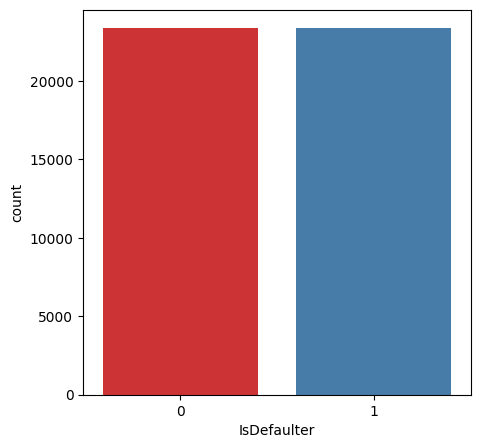

In [43]:
#checking for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x='IsDefaulter', data = balanced_df, palette = "Set1" ) # Added x='IsDefaulter'

In [44]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [45]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [46]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,True,False,False,False,False,False,False,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,0


In [47]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [49]:
X.shape

(46728, 78)

In [51]:
y.shape

(46728,)

# Data Transformation

In [52]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Splitting

In [53]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [54]:
X_train.shape

(37382, 78)

In [55]:
X_test.shape

(9346, 78)

# Model Implementation